In [1]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Importing Dataset
df = pd.read_csv("salary.csv")
pd.set_option("display.max_columns", None) 
df.head(1)

C:\Users\sweet\AppData\Local\Temp\ipykernel_14188\3210461817.py:2: DtypeWarning: Columns (16,18,20) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("salary.csv")


AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88    75.9615        29.0  9545.82  114549.84        127717   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN

In [3]:
# There is a warning while loading the dataset this is due to the dataset cotains mixed data types to overcome this
# Loading the dataset with low_memory set to False
df = pd.read_csv("salary.csv", low_memory=False)
df.head()

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   
2     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3     212  OFFICE OF COURT ADMINISTRATION                ...   
4     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   
2  SPECIA JR                       JOHN                            J   
3  SPECIA JR                       JOHN                            J   
4  ONTIVEROS                       ESTHER                              

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   
2   JD25      JUDGE, RETIRED                                ...   
3   3524      GENERAL COUNSEL IV                            ...   
4   4504      CORREC  OFFICER IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
2  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
3  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       
4  HISPANIC         FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME         

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  \
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717   
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717   
2    02/01/20   75.96150        29.0  9545.82  114549.84         59115   
3    09/01/18   81.04453         4.0  1404.77   16857.24         59115   
4    06/29/20    0.00000        40.0  3284.27   39411.24        165030   

  duplicated  multiple_full_time_jobs combined_multiple_jobs  \
0       True                      NaN                    NaN   
1       True                      NaN                    NaN   
2       True                      NaN                    NaN   
3       True                      NaN                    NaN   
4       True                      1.0                    NaN   

   summed_annual_salary hide_from_search  
0             131407.08              NaN  
1                   NaN             True  
2             131407.08              NaN  
3                   NaN             True  
4                   NaN              NaN

# 1) Basic Checks and data filtering

In [5]:
df.shape

(149481, 21)

#### There are 21 features present in the dataset with each having 149481 entries.
####

In [7]:
# Checking for the duplicates 
df.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
149476    False
149477    False
149478    False
149479    False
149480    False
Length: 149481, dtype: bool>

#### No actual duplicates present in the data.
####

In [9]:
# Now let's check for the column 'duplicated'.
# Checking for unique entries in the 'duplicated' column.
print(df['duplicated'].unique())
# Checking the occurence of the unique values.
print(df['duplicated'].value_counts())

[True nan]
duplicated
True    143
Name: count, dtype: int64


In [10]:
# Checking for unique entries in 'multiple_full_time_jobs' column.
print(df['multiple_full_time_jobs'].unique())
# Checking the occurence of the unique values.
print(df['multiple_full_time_jobs'].value_counts())

[nan  1.]
multiple_full_time_jobs
1.0    14
Name: count, dtype: int64


In [11]:
# Checking for unique entries in 'combined_multiple_jobs' column.
print(df['combined_multiple_jobs'].unique())
# Checking for the occurence of unique values.
print(df['combined_multiple_jobs'].value_counts())

[nan True]
combined_multiple_jobs
True    97
Name: count, dtype: int64


In [12]:
# Checking for unique entries in 'summed_annual_salary' column.
print(df['summed_annual_salary'].nunique())
# Checking for the occurence of unique values.
print(df['summed_annual_salary'].value_counts())

15
summed_annual_salary
131407.08    2
171383.40    1
31950.00     1
33300.00     1
33966.00     1
39174.00     1
35570.52     1
56952.60     1
21839.76     1
121200.00    1
90000.00     1
150000.00    1
92400.00     1
18000.00     1
30312.84     1
Name: count, dtype: int64


In [13]:
# Checking for unique entries in 'hide_from_search' column.
print(df['hide_from_search'].nunique())
# Checking for the occurence of unique values.
print(df['hide_from_search'].value_counts())

1
hide_from_search
True    16
Name: count, dtype: int64


### Interpretation:
#### "The columns 'is_duplicated', 'multiple_full_time_jobs', 'combined_multiple_jobs', 'summed_annual_salary', and 'hide_from_search' do not contribute much to the dataset because most of their values are 'NaN'. Therefore, we will remove these columns
####

In [15]:
# Removing the unnecessary columns.
columns_to_remove = ['duplicated',  'multiple_full_time_jobs', 'combined_multiple_jobs', 
                     'summed_annual_salary', 'hide_from_search']
df = df.drop(columns=columns_to_remove)
df.head(2)

AGENCY                                        AGENCY NAME  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1     212  OFFICE OF COURT ADMINISTRATION                ...   

                        LAST NAME                      FIRST NAME MI  \
0  RUCKER                          MORTON                          V   
1  RUCKER                          MORTON                          V   

  CLASS CODE                                        CLASS TITLE  \
0   JD25      JUDGE, RETIRED                                ...   
1   3524      GENERAL COUNSEL IV                            ...   

         ETHNICITY           GENDER                                    STATUS  \
0  WHITE            MALE             URP - UNCLASSIFIED REGULAR PART-TIME       
1  WHITE            MALE             CTP - CLASSIFIED TEMPORARY PART-TIME       

  EMPLOY DATE  HRLY RATE  HRS PER WK  MONTHLY     ANNUAL  STATE NUMBER  
0    02/18/88   75.96150        29.0  9545.82  114549.84        127717  
1    02/01/15   81.04454         4.0  1404.77   16857.24        127717

In [16]:
# Checking the data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149481 entries, 0 to 149480
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   AGENCY        149481 non-null  int64  
 1   AGENCY NAME   149481 non-null  object 
 2   LAST NAME     149481 non-null  object 
 3   FIRST NAME    149481 non-null  object 
 4   MI            149481 non-null  object 
 5   CLASS CODE    149481 non-null  object 
 6   CLASS TITLE   149481 non-null  object 
 7   ETHNICITY     149481 non-null  object 
 8   GENDER        149481 non-null  object 
 9   STATUS        149481 non-null  object 
 10  EMPLOY DATE   149481 non-null  object 
 11  HRLY RATE     149481 non-null  float64
 12  HRS PER WK    149481 non-null  float64
 13  MONTHLY       149481 non-null  float64
 14  ANNUAL        149481 non-null  float64
 15  STATE NUMBER  149481 non-null  int64  
dtypes: float64(4), int64(2), object(10)
memory usage: 18.2+ MB


#### There are total 6 columns with the 'numeric' data type and 10 columns with the 'object' data type.
####

In [18]:
# Renaming the features
new_column_names = {
    'AGENCY': 'agency',
    'AGENCY NAME': 'agency_name',
    'LAST NAME': 'last_name',
    'FIRST NAME': 'first_name',
    'MI': 'middle_initial',
    'CLASS TITLE': 'class_title',
    'CLASS CODE': 'class_code',
    'ETHNICITY': 'ethnicity',
    'GENDER': 'gender',
    'STATUS': 'status',
    'EMPLOY DATE': 'employ_date',
    'HRLY RATE': 'hourly_rate',
    'HRS PER WK': 'hours_per_week',
    'MONTHLY': 'monthly_income',
    'ANNUAL': 'annual_income',
    'summed_anual_salary': 'summed_annual_income',
    'STATE NUMBER': 'state_number'
}
df.rename(columns=new_column_names, inplace=True)
print(df.columns)

Index(['agency', 'agency_name', 'last_name', 'first_name', 'middle_initial',
       'class_code', 'class_title', 'ethnicity', 'gender', 'status',
       'employ_date', 'hourly_rate', 'hours_per_week', 'monthly_income',
       'annual_income', 'state_number'],
      dtype='object')


In [19]:
df.head(1)

agency                                        agency_name  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   

                        last_name                      first_name  \
0  RUCKER                          MORTON                           

  middle_initial class_code  \
0              V   JD25       

                                         class_title        ethnicity  \
0  JUDGE, RETIRED                                ...  WHITE             

            gender                                    status employ_date  \
0  MALE             URP - UNCLASSIFIED REGULAR PART-TIME        02/18/88   

   hourly_rate  hours_per_week  monthly_income  annual_income  state_number  
0      75.9615            29.0         9545.82      114549.84        127717

# 2) EDA

## i) Descriptive Statistics

In [22]:
df.describe()

agency    hourly_rate  hours_per_week  monthly_income  \
count  149481.000000  149481.000000   149481.000000   149481.000000   
mean      545.736288       0.346488       39.714918     4226.184248   
std       139.057691       4.211485        2.323855     2093.111691   
min       101.000000       0.000000        1.000000       50.000000   
25%       529.000000       0.000000       40.000000     3019.840000   
50%       530.000000       0.000000       40.000000     3720.170000   
75%       696.000000       0.000000       40.000000     4865.810000   
max       930.000000     117.788480       70.000000    46125.000000   

       annual_income  state_number  
count  149481.000000  1.494810e+05  
mean    50714.210973  5.651930e+05  
std     25117.340292  4.786212e+05  
min       600.000000  1.000000e+00  
25%     36238.080000  1.133340e+05  
50%     44642.040000  3.463730e+05  
75%     58389.720000  1.100500e+06  
max    553500.000000  1.271604e+06

In [23]:
df.mode().iloc[0]

agency                                                        529.0
agency_name       HEALTH AND HUMAN SERVICES COMMISSION          ...
last_name                            SMITH                         
first_name                           MICHAEL                       
middle_initial                                                     
class_code                                                 4504    
class_title       CORREC  OFFICER IV                            ...
ethnicity                                           WHITE          
gender                                              FEMALE         
status                     CRF - CLASSIFIED REGULAR FULL-TIME      
employ_date                                                09/01/17
hourly_rate                                                     0.0
hours_per_week                                                 40.0
monthly_income                                              3720.17
annual_income                                   

### Interpretation:
#### 1) The maximum hourly rate is around 118 dollars, while the minimum is less than 1 dollar.
#####
#### 2) The maximum working hours per week are 70 hours, and the minimum is 1 hour.
#####
#### 3) The maximum monthly income by an employee is 46,125 dollars, while the minimum is 50 dollars.
#####
#### 4) The maximum annual income by an employee is 553,500 dollars, while the minimum is 600 dollars.
#####
#### 5) On average, the highest number of employees are working in the 'HEALTH AND HUMAN SERVICES COMMISSION' agency.
#####
#### 6) On average, the highest number of employees are working as 'CORRECTIONAL OFFICER IV'.
#####
#### 7) On average, most employees belong to the 'White' ethnicity.
#####
#### 8) On average, there are more female employees working than male employees.
#####
#### 9) On average, most employees have an employment status of 'CRF - CLASSIFIED REGULAR FULL-TIME'.
##### 
#### 10) On average, most employees have an hourly rate of less than 1 dollar, work 40 hours per week, have a monthly income of around 3,720 dollars, and an annual income of around 44,642 dollars.
#####

## ii) Univariate Analysis

In [26]:
print(df['agency'].nunique())
print(df['class_title'].nunique())

113
1422


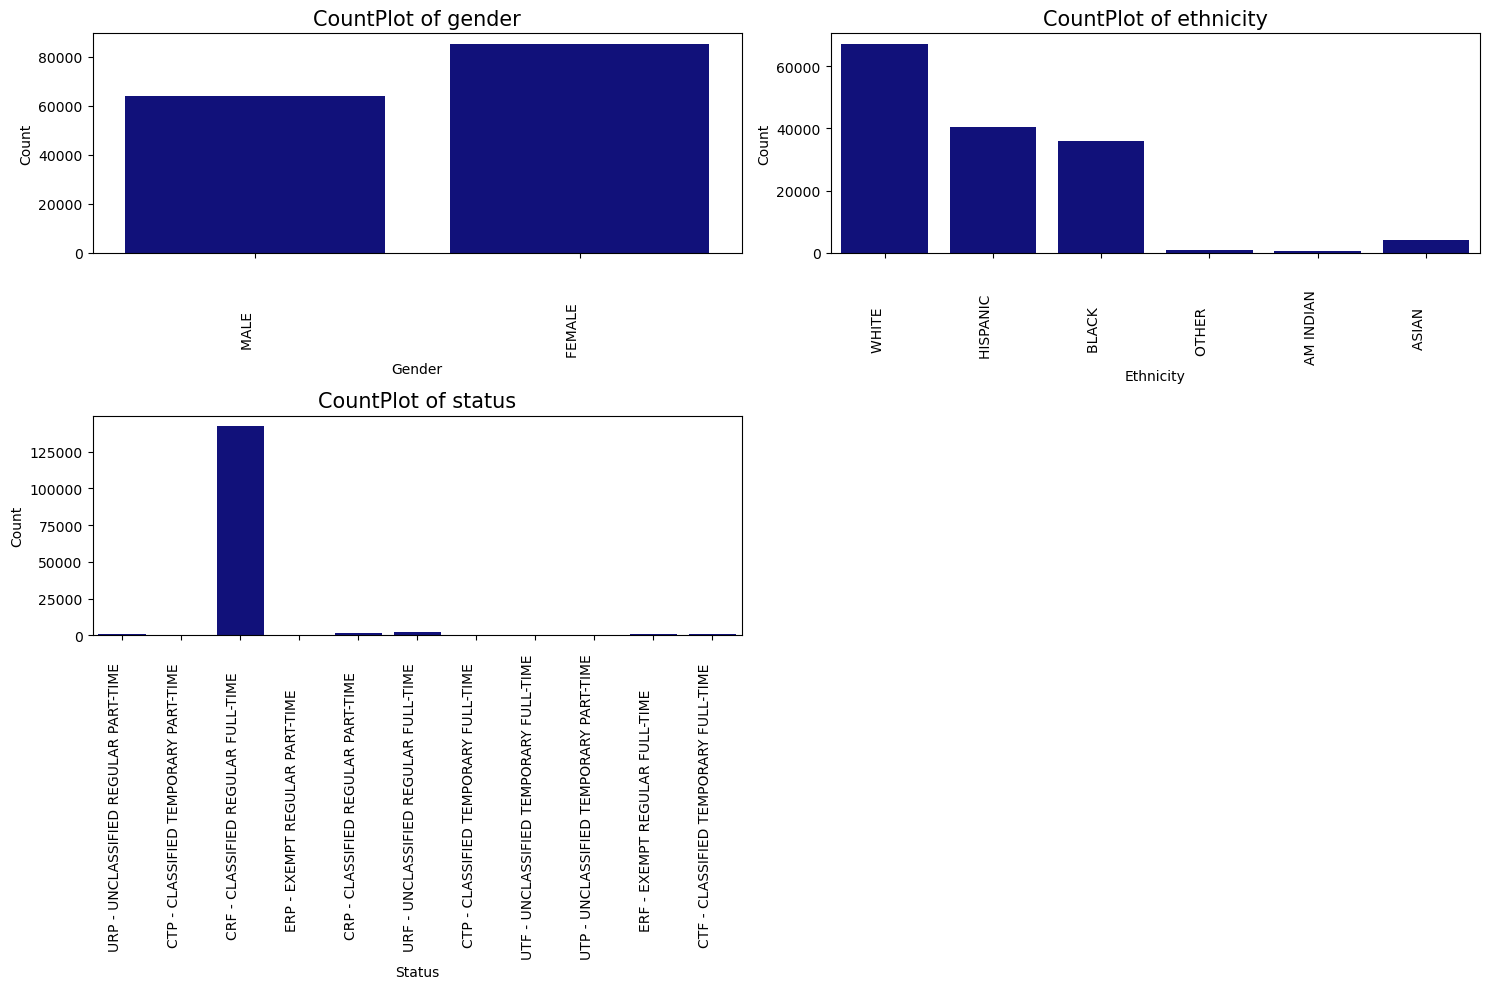

In [27]:
# Countplot for the 'gender' and ethnicity
features = ['gender', 'ethnicity', 'status']
data = df
plt.figure(figsize=(15,10))
i = 1
for feature in features:
    plt.subplot(2, 2, i)
    sns.countplot(x= feature , data=df, color='darkblue')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'CountPlot of {feature}', fontsize=15)
    plt.xlabel(feature.capitalize(), fontsize=10)
    plt.ylabel('Count', fontsize=10)
    i=i+1
plt.tight_layout()
plt.show()

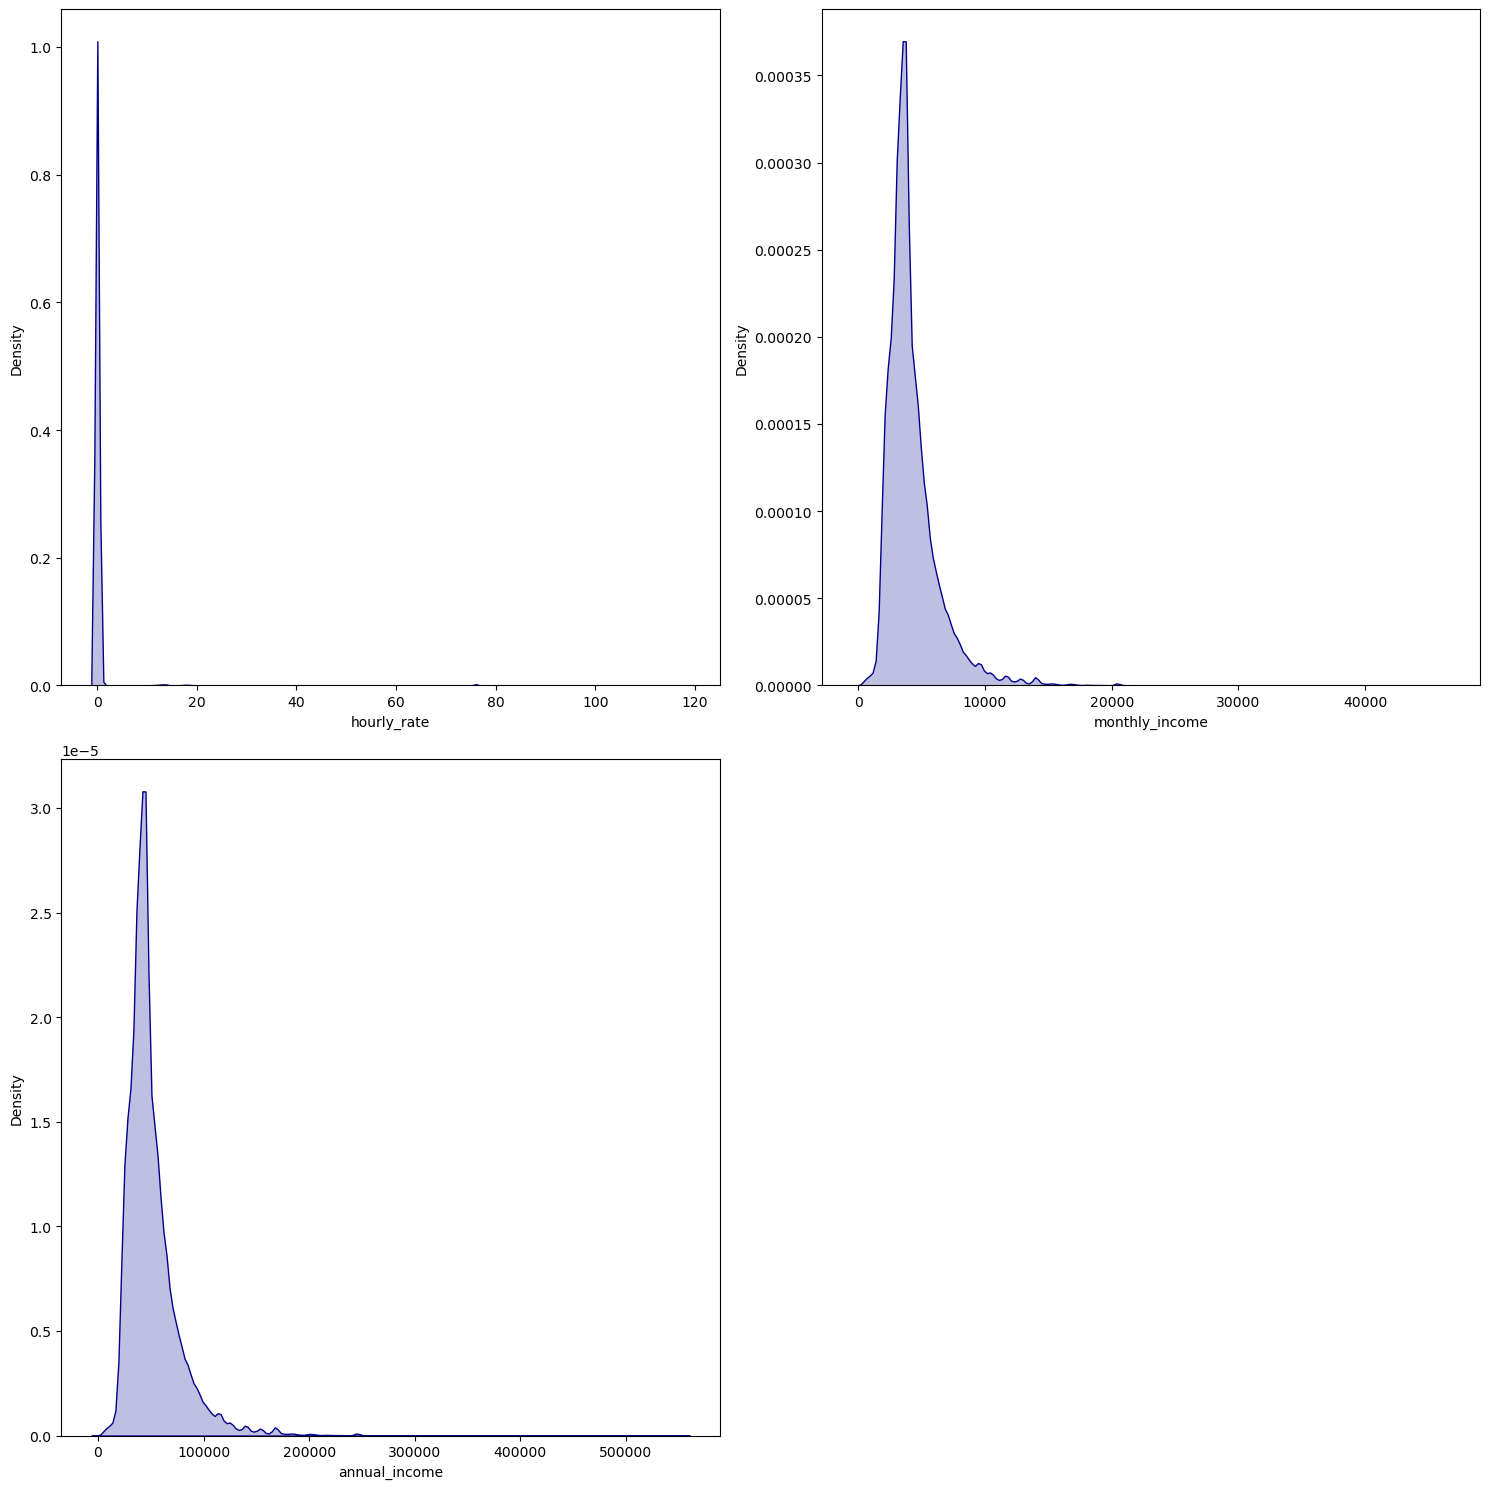

In [28]:
# Checking the distribution of continuous features
conti_var = ['hourly_rate', 'monthly_income', 'annual_income']
data = df
plt.figure(figsize=(15, 15))

i = 1
for var in conti_var:
    plt.subplot(2, 2, i)
    sns.kdeplot(x=var, data=df, color='darkblue', fill = True)
    plt.xlabel(var, fontsize=10)
    i += 1

plt.tight_layout()
plt.show()

### Interpretation(Univariate Analysis):
#### 1) There are 113 different agencies working for the Texas State government.
#####
#### 2) There are 1,422 different posts held by employees in the Texas State government.
#####
#### 3) The number of female employees is greater than the number of male employees working for the Texas State government.
#####
#### 4) The largest number of employees belong to the White ethnicity, which may be because Texas has a larger population of white residents.
#####
#### 5) Most employees have the employment status of CRF (Classified Regular Full-Time), meaning they work full-time, have regular hours, and follow specific rules and regulations.
#####
#### 6) The distribution of "hourly_rate", "monthly_income" and "annual_income" is positively skewed and the distribution.
#####

## iii) Bivariate Analysis

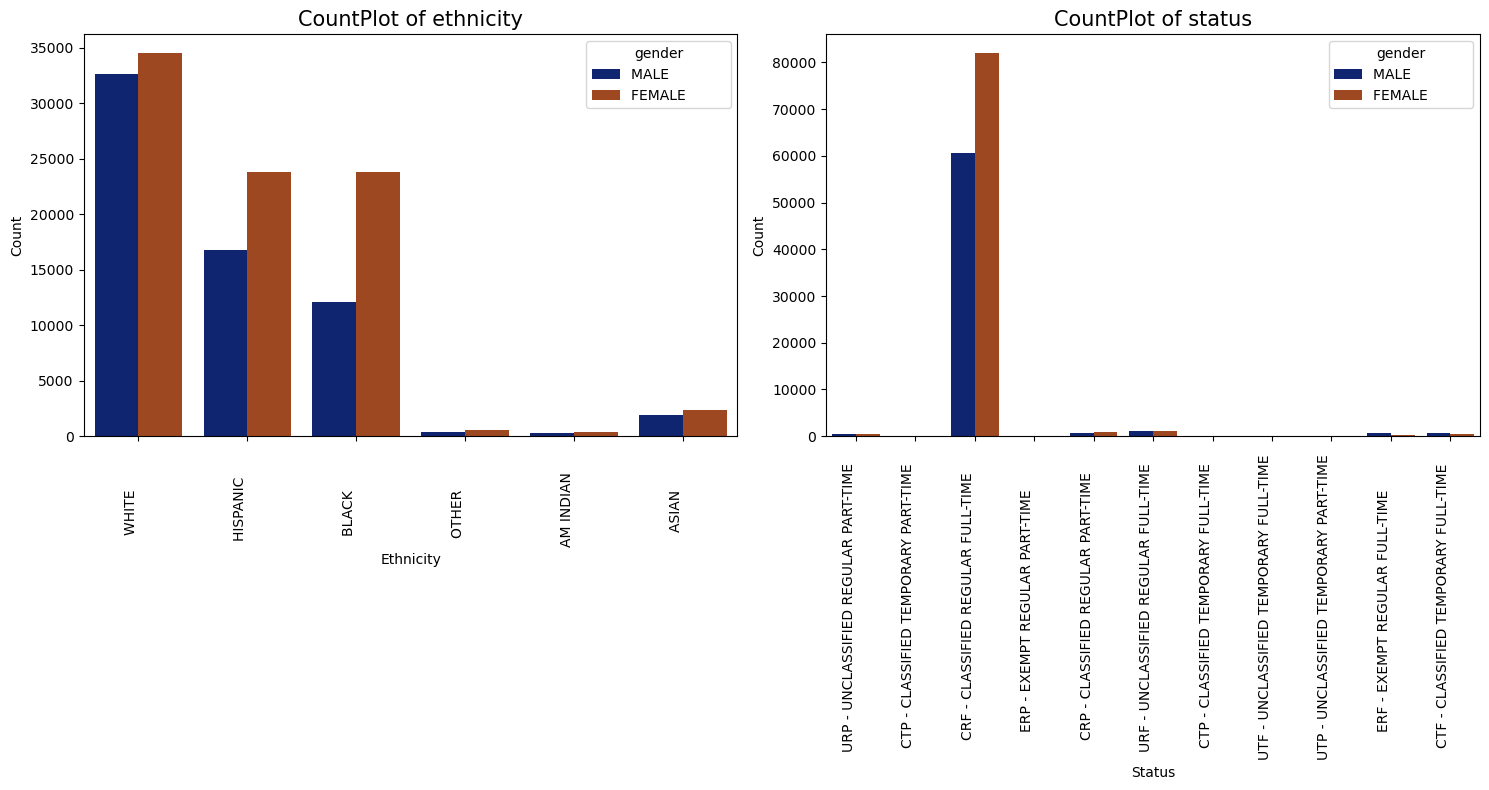

In [31]:
# Countplot for the 'status' and ethnicity based on 'gender'
features = ['ethnicity', 'status']
data = df
plt.figure(figsize=(15,8))
i = 1
for feature in features:
    plt.subplot(1, 2, i)
    sns.countplot(x= feature , data=df, hue= 'gender', palette= 'dark')
    plt.xticks(rotation=90, ha='right')
    plt.title(f'CountPlot of {feature}', fontsize=15)
    plt.xlabel(feature.capitalize(), fontsize=10)
    plt.ylabel('Count', fontsize=10)
    i=i+1
plt.tight_layout()
plt.show()

In [32]:
# We have to convert the categorical data into numeric form by using label encoding for the necessary columns.
from sklearn.preprocessing import LabelEncoder
df_new = df.copy()
# Initializing the LabelEncoder
le = LabelEncoder()
# Columns to encode
columns_to_encode = ['class_code','ethnicity', 'gender', 'status','first_name', 'last_name', 'middle_initial']
# Applying label encoding
for col in columns_to_encode:
    df_new[col] = le.fit_transform(df[col])
df_new.head(2)

agency                                        agency_name  last_name  \
0     241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...      30461   
1     212  OFFICE OF COURT ADMINISTRATION                ...      30461   

   first_name  middle_initial  class_code  \
0       15274              22        1409   
1       15274              22         616   

                                         class_title  ethnicity  gender  \
0  JUDGE, RETIRED                                ...          5       1   
1  GENERAL COUNSEL IV                            ...          5       1   

   status employ_date  hourly_rate  hours_per_week  monthly_income  \
0       8    02/18/88     75.96150            29.0         9545.82   
1       4    02/01/15     81.04454             4.0         1404.77   

   annual_income  state_number  
0      114549.84        127717  
1       16857.24        127717

#### "We didn't convert the 'agency_name' and 'class_title' into numeric values because each value in these columns has a unique equivalent in the 'agency' and 'class_code' columns. To avoid overlapping and to save time on training models, we excluded those columns."
####

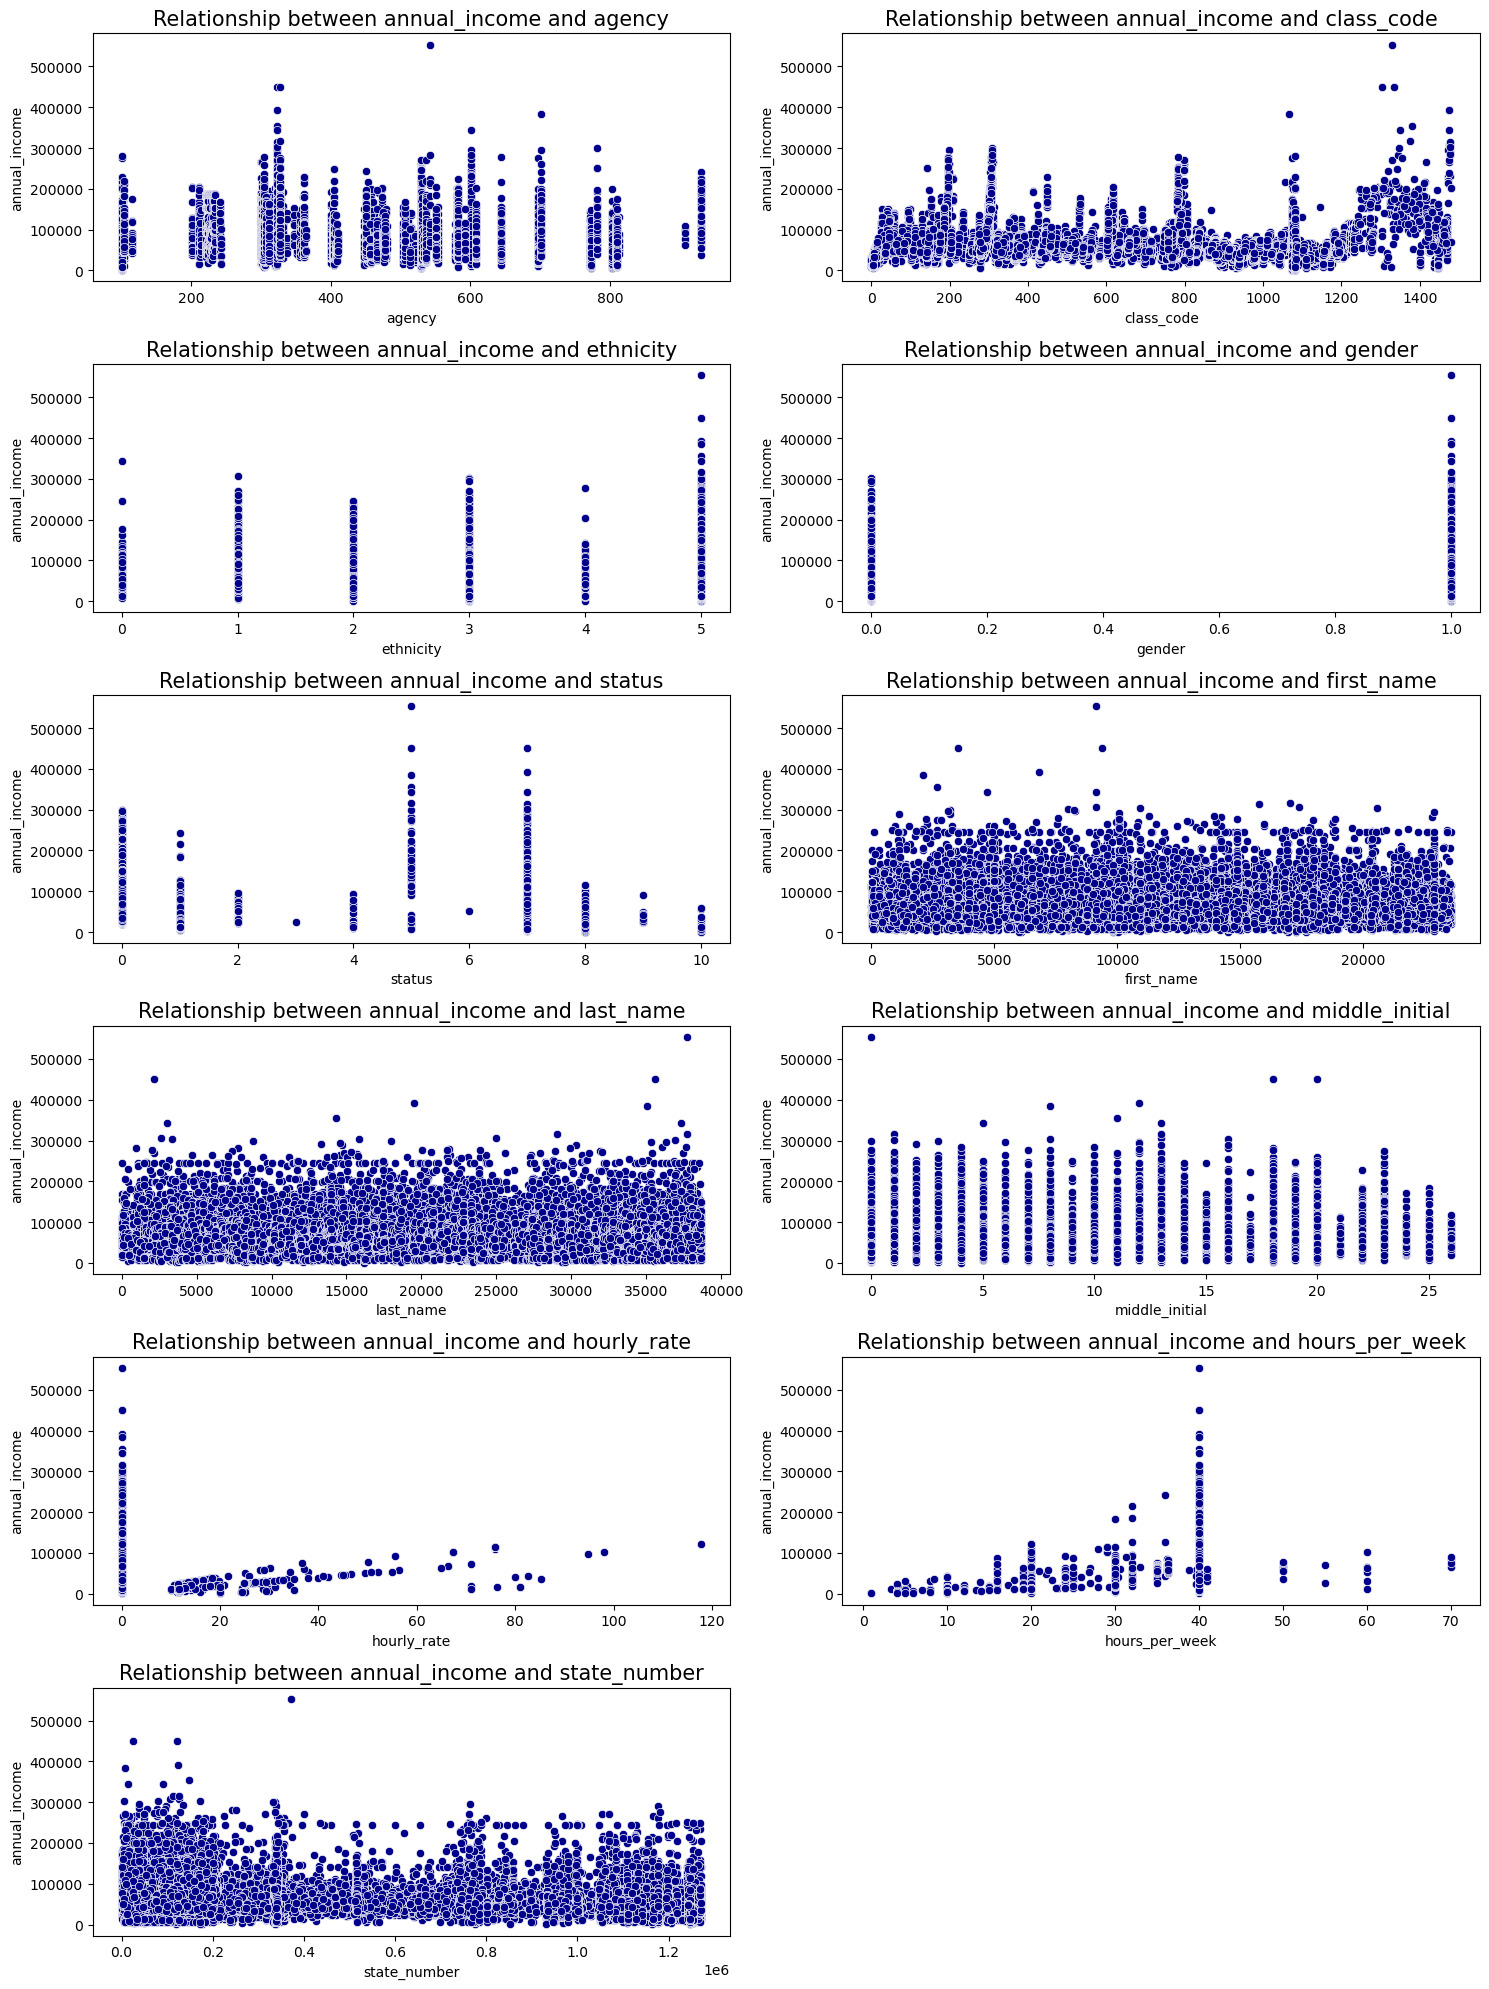

In [34]:
# checking for the relationship between dependent(monthly_income) and independent variables.
ind_var = ['agency', 'class_code', 'ethnicity', 'gender', 'status',
           'first_name', 'last_name', 'middle_initial', 
           'hourly_rate', 'hours_per_week','state_number']
data=df_new
plt.figure(figsize=(15,20))
i=1
for var in ind_var:
    plt.subplot(6, 2, i)
    sns.scatterplot(x=var, y='annual_income', data=df_new, color='darkblue')
    plt.title(f'Relationship between annual_income and {var}', fontsize=15)
    i=i+1
plt.tight_layout()
plt.show()

### Interpretation(Bivariate Analysis):
#### 1) As the overall number of female employees is greater than male employees, the number of female employees in every ethnicity is also greater than males.
#####
#### 2) The number of female employees is higher with classified regular full-time status, but for class exempt regular full-time and classified temporary full-time, male employees are more than female employees.
#####
#### 3) There is no particular relationship between the dependent and independent variables. So, we can't use linear regression, which requires a linear relationship between dependent and independent variables.
#####
#### 4) According to ethnicity, White employees have more annual income than others, around 40,000 dollars, and for some, more than that.
#####
#### 5) It is observed that certain male employees have more annual income than all female employees.
#####
#### 6) Generally, employees with a high hourly rate have high annual income, but it is observed that employees with a low hourly rate have more annual income than others. This may be due to extra hours of working.
#####
#### 7) It is observed that employees having 40 working hours per week have the highest annual income.
#####


## iii) Multivariate Analysis

<Axes: >

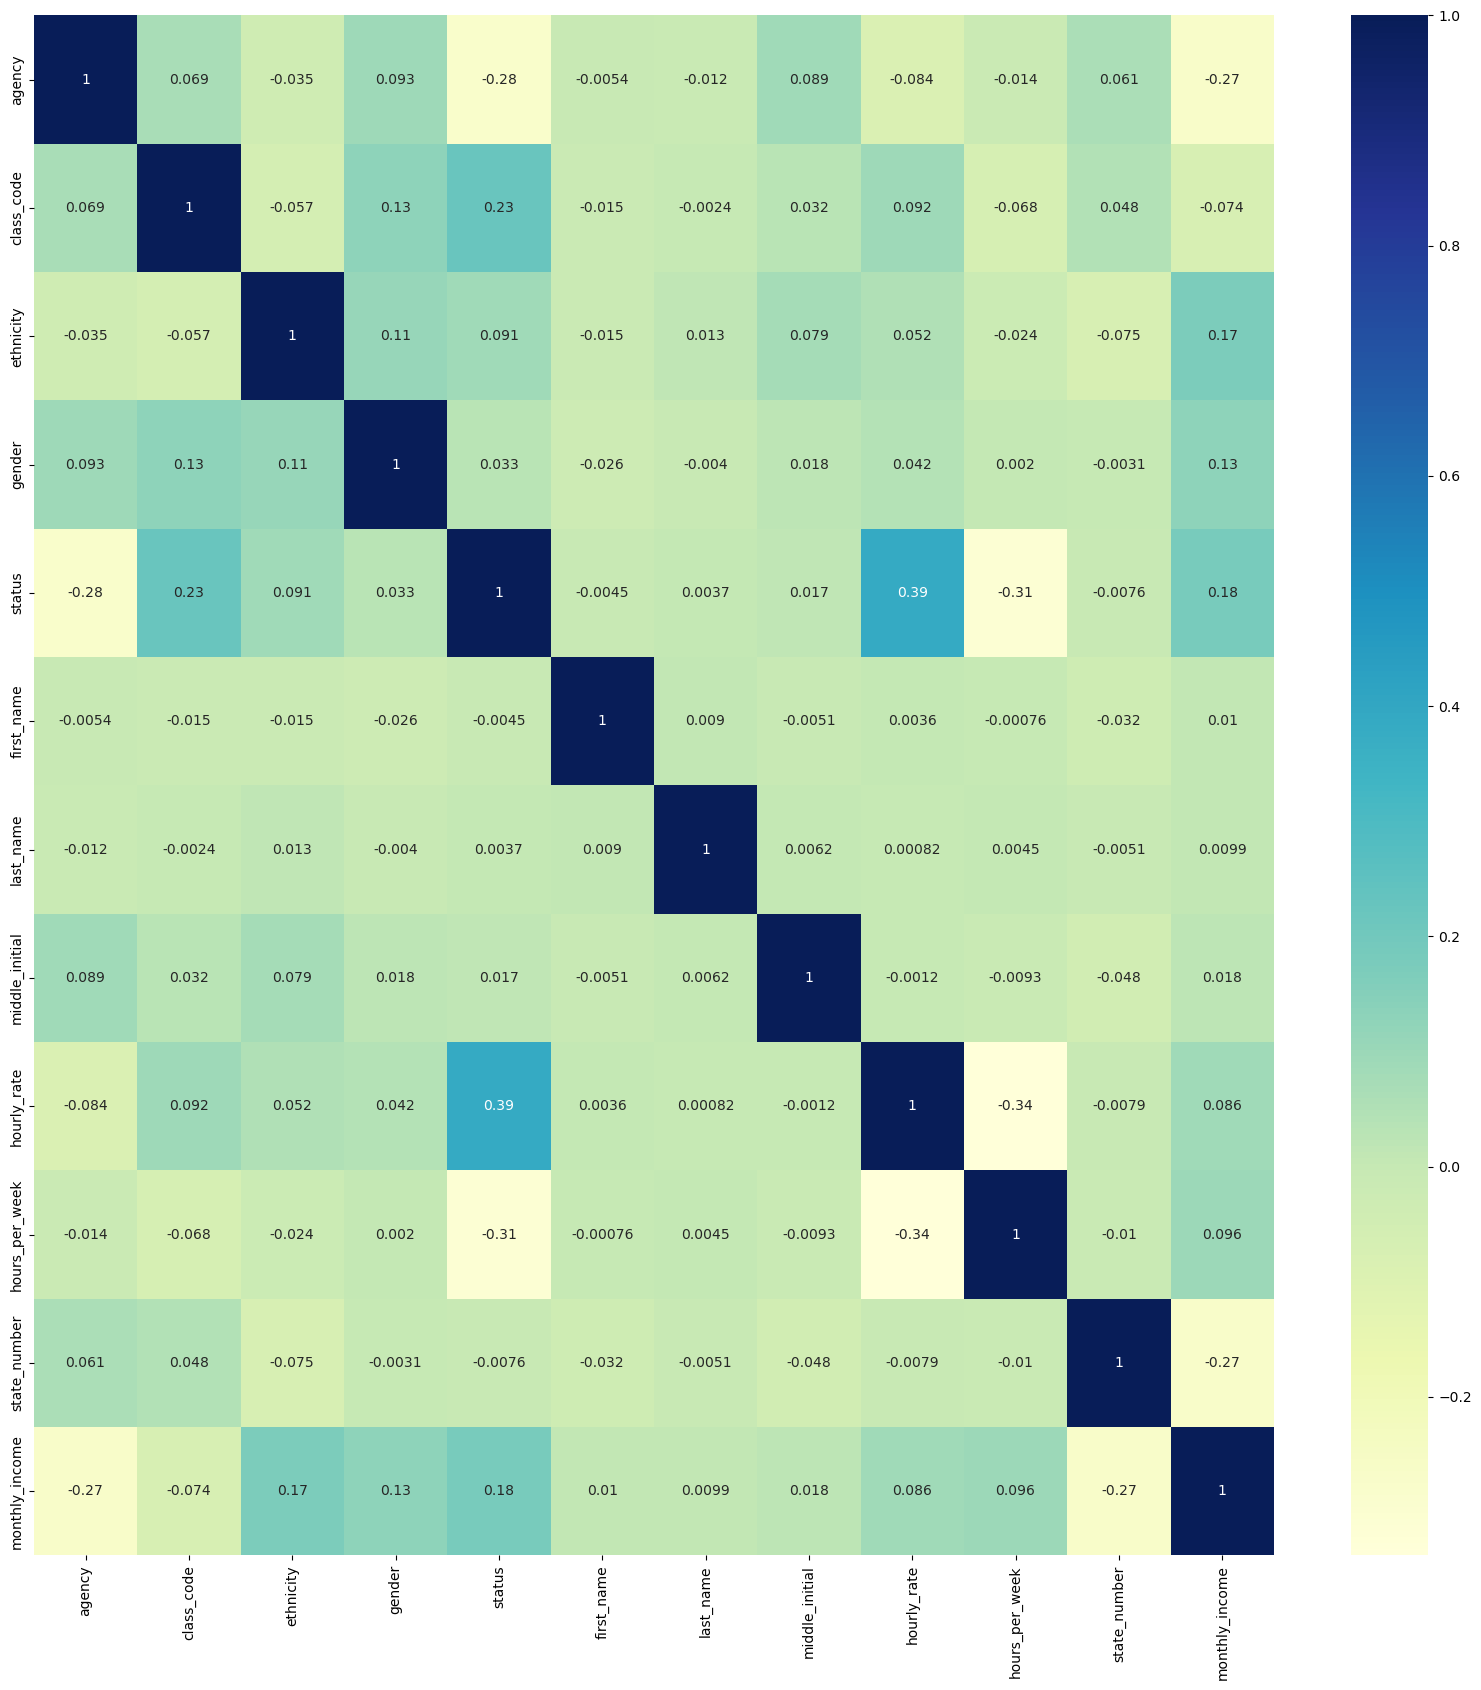

In [37]:
# Corr. Matrix
var = ['agency', 'class_code', 'ethnicity', 'gender', 'status',
           'first_name', 'last_name', 'middle_initial', 
           'hourly_rate', 'hours_per_week','state_number', 'monthly_income']
corr_matrix = df_new[var].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

#### There is no multicollinearirty in the selected features.
####

# 3) Data Preprocessing and Feature Engineering

## i) Outliers Handling

<Axes: ylabel='annual_income'>

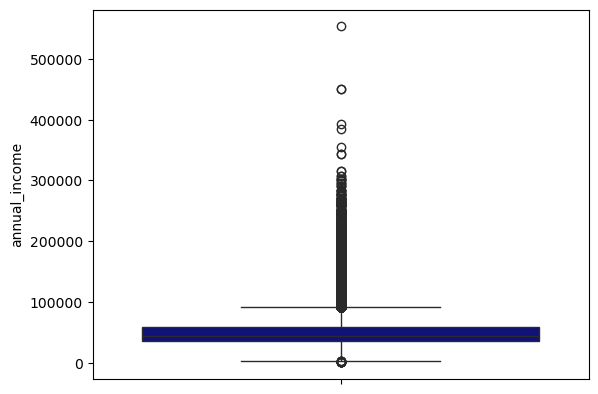

In [41]:
# Checking the outliers for 'annual_income'
sns.boxplot(df_new['annual_income'], color = 'darkblue')

In [42]:
# IQR method to remove outliers
Q1 = df_new['annual_income'].quantile(0.25)
Q3 = df_new['annual_income'].quantile(0.75)
IQR = Q3-Q1
lb_AI = Q1-1.5*IQR
print(lb_AI)
ub_AI = Q3+1.5*IQR
print(ub_AI)

3010.6200000000026
91617.18


#### The upper bound value is 91,617.18 and the lower bound value is 3,010.62, which indicates that all employees who earn more than 91,617.18 dollars annually and less than 3,010 dollars annually are the outliers.
#####

<Axes: ylabel='hourly_rate'>

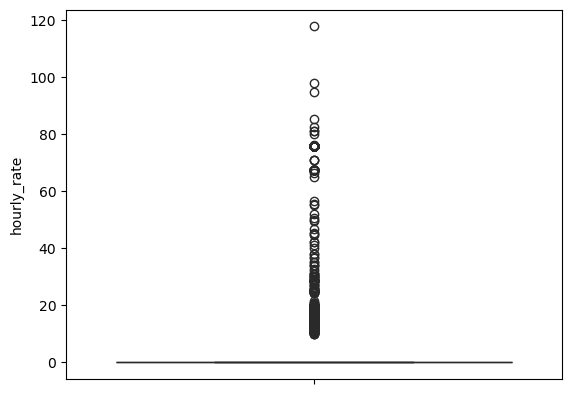

In [44]:
# Checking outliers for hourly_rate
sns.boxplot(df_new['hourly_rate'], color = 'darkblue')

#### The boxplot is showing too many outliers because the data is highly positively skewed and highly concentrated around the value zero. Let's cross-verify this using IQR.
#####

In [46]:
Q1 = df_new['hourly_rate'].quantile(0.25)
Q3 = df_new['hourly_rate'].quantile(0.75)
IQR = Q3-Q1
lb_HR = Q1-1.5*IQR
print(lb_HR)
ub_HR = Q3+1.5*IQR
print(ub_HR)

0.0
0.0


#### The lower and upper bound value of 0 indicates that all values other than zero are outliers, but this may give us a misleading result. 
####

<Axes: ylabel='hours_per_week'>

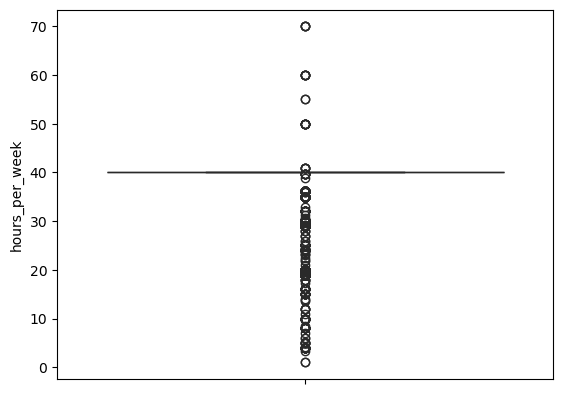

In [48]:
# Checking outliers for hours_per_week.
sns.boxplot(df_new['hours_per_week'], color = 'darkblue')

#### The boxplot is showing too many outliers because the data is highly positively skewed and highly concentrated around the value 40. Let's cross-verify this using IQR.
#####

In [50]:
Q1 = df_new['hours_per_week'].quantile(0.25)
Q3 = df_new['hours_per_week'].quantile(0.75)
IQR = Q3-Q1
lb_HPW = Q1-1.5*IQR
print(lb_HPW)
ub_HPW = Q3+1.5*IQR
print(ub_HPW)

40.0
40.0


#### The lower and upper bound value of 40 indicates that all values other than 40 are outliers, but this may give us a misleading result. 
####

### Interpretation:
#### The outliers observed in the boxplot are natural outliers, so removing them may not be appropriate.
#### We will try to use the regression models that are not sensetive to the outliers.
#####

## ii) feature seletion and transformation

In [54]:
data_new = df_new[['agency', 'class_code', 'ethnicity', 'gender', 'status',
                 'first_name', 'last_name', 'middle_initial', 
                 'hourly_rate', 'hours_per_week', 'state_number', 'annual_income']]
data_new.head()

agency  class_code  ethnicity  gender  status  first_name  last_name  \
0     241        1409          5       1       8       15274      30461   
1     212         616          5       1       4       15274      30461   
2     241        1409          5       1       8       10053      33197   
3     212         616          5       1       4       10053      33197   
4     696         810          3       0       0        6953      26462   

   middle_initial  hourly_rate  hours_per_week  state_number  annual_income  
0              22     75.96150            29.0        127717      114549.84  
1              22     81.04454             4.0        127717       16857.24  
2              10     75.96150            29.0         59115      114549.84  
3              10     81.04453             4.0         59115       16857.24  
4               0      0.00000            40.0        165030       39411.24

#### We have to standardize the hourly_rate, hours_per_week, and monthly_income because hourly_rate and annual_income are continuous variables, and hours_per_week is discrete but ordinal. The variables have different scales.
#####
#### Before standardizing these variables, we have to check the distribution of continuous variables. If it is normal, then there is no need for transformation; if not, we should apply a transformation first.
#####
#### The hourly rate is highly positively skewed.( result from univariate analysis).
#####
#### The distribution of 'annual_income' is positively skewed.(result from univariate analysis)
#####


#### We use square root transformation to reduce the skewness of these columns. In such situations, log transformation is more effective, but the feature contains some values of 0.

In [57]:
data_new.loc[: , 'hourly_rate'] = np.sqrt(data_new['hourly_rate'])
data_new.loc[:, 'annual_income'] = np.sqrt(data_new['annual_income'])
data_new.head(2)

agency  class_code  ethnicity  gender  status  first_name  last_name  \
0     241        1409          5       1       8       15274      30461   
1     212         616          5       1       4       15274      30461   

   middle_initial  hourly_rate  hours_per_week  state_number  annual_income  
0              22     8.715589            29.0        127717     338.452124  
1              22     9.002474             4.0        127717     129.835434

In [58]:
# Standerdizing the numerical_columns which are either conti. or ordinal
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_col = ['hourly_rate', 'hours_per_week', 'annual_income']
data_new.loc[: , num_col] = scaler.fit_transform(data_new[num_col])

In [59]:
data_new.head(1)

agency  class_code  ethnicity  gender  status  first_name  last_name  \
0     241        1409          5       1       8       15274      30461   

   middle_initial  hourly_rate  hours_per_week  state_number  annual_income  
0              22     14.78065       -4.610854        127717       2.432935

## iii) data split

In [61]:
from sklearn.model_selection import train_test_split
X=data_new.iloc[:, : -1]
y=data_new.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 4) Model Implimentation

## i) Decision Tree Regressor

In [64]:
from sklearn.tree import DecisionTreeRegressor
tree_model = DecisionTreeRegressor()
tree_model.fit(X_train, y_train)

DecisionTreeRegressor()

In [65]:
y_predict = tree_model.predict(X_test)

### Model Evaluation:

In [67]:
from sklearn.metrics import mean_squared_error, r2_score
mse_dec_tree = mean_squared_error(y_test, y_predict)
r2_score_dec_tree = r2_score(y_test, y_predict)
print("mean squared error of DT regressor is:", mse_dec_tree)
print("coeff. of determination of DT regressor is:", r2_score_dec_tree )

mean squared error of DT regressor is: 0.11753053788406437
coeff. of determination of DT regressor is: 0.8826267076102641


#### Good Model Performance: The combination of a low MSE and a high R² score suggests that the model is performing well in predicting the target variable.

#### Reliable Predictions: The high R² value indicates that the model reliably captures the underlying patterns in the data, while the low MSE implies that prediction errors are minimal.

## ii) Random Forest Regressor

In [70]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [71]:
y_predict_rf = rf_model.predict(X_test)

### Model Evaluation:

In [73]:
from sklearn.metrics import mean_squared_error, r2_score
mse_rf = mean_squared_error(y_test, y_predict_rf)
print("mean squared error of rf model is :", mse_rf)
r2_score_rf = r2_score(y_test, y_predict_rf)
print("coeff. of determination for rf model is :", r2_score_rf )

mean squared error of rf model is : 0.06692564321668876
coeff. of determination for rf model is : 0.9331638973915678


#### Strong Model Performance: The combination of a low MSE and a high R² score indicates that the Random Forest model is performing exceptionally well.

#### Reliable Predictions: The high R² score implies that the features used in the model have strong predictive power, and the low MSE confirms that the prediction errors are minimal.

# 5) Identifying 'who are the outliers ?'

<Axes: ylabel='annual_income'>

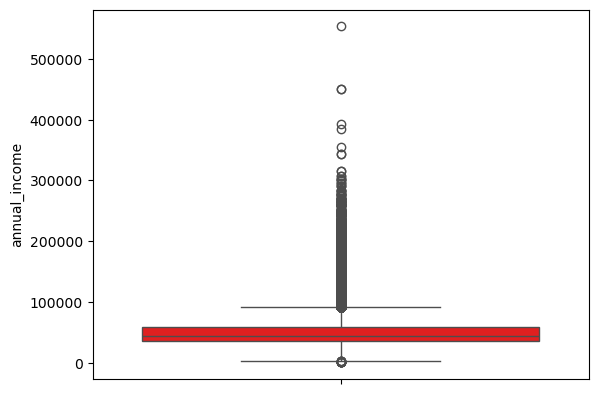

In [76]:
sns.boxplot(df['annual_income'], color = "red")

In [77]:
print(lb_AI)
print(ub_AI)

3010.6200000000026
91617.18


#### As per the IQR method, the annual_income below the lb_AI and above the ub_AI are outliers, but we know that these are natural outliers. However, for the use of the Texas State Government, we will identify the outliers that may be significant and useful.

#### From the box plot, it is observed that the concentration of annual salary is very high up to 300,000, so we consider the entries above that as outliers.

In [80]:
outliers_AI = df[df['annual_income'] > 300000]
pd.set_option('display.max_rows', None)
outliers_AI

agency                                        agency_name  \
14793      323  TEACHER RETIREMENT SYSTEM                     ...   
14800      323  TEACHER RETIREMENT SYSTEM                     ...   
14814      323  TEACHER RETIREMENT SYSTEM                     ...   
15041      323  TEACHER RETIREMENT SYSTEM                     ...   
15078      323  TEACHER RETIREMENT SYSTEM                     ...   
15154      323  TEACHER RETIREMENT SYSTEM                     ...   
15283      323  TEACHER RETIREMENT SYSTEM                     ...   
15349      323  TEACHER RETIREMENT SYSTEM                     ...   
15525      323  TEACHER RETIREMENT SYSTEM                     ...   
15539      323  TEACHER RETIREMENT SYSTEM                     ...   
83851      542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   
84769      601  TEXAS DEPARTMENT OF TRANSPORTATION            ...   
136727     701  TEXAS EDUCATION AGENCY                        ...   
144232     327  EMPLOYEES RETIREMENT SYSTEM                   ...   
144262     327  EMPLOYEES RETIREMENT SYSTEM                   ...   

                             last_name                      first_name  \
14793   AUBY                            JASE                             
14800   BALACHANDRAN                    RAM                              
14814   BELL                            SYLVIA                           
15041   GUTHRIE                         BRIAN                            
15078   HOFFMAN                         KATHLEEN                         
15154   LANG                            ERIC                             
15283   NIELD                           JAMES                            
15349   RANDALL                         NEIL                             
15525   WALKER                          GRANT                            
15539   WEST                            DALE                             
83851   WILLSON                         JAMES                            
84769   BASS                            JAMES                            
136727  TIMMINS III                     BARNEY                           
144232  TULL                            CHARLES                          
144262  WILSON                          PORTER                           

       middle_initial class_code  \
14793               R   C204       
14800               M   U105       
14814               P   U105       
15041               K   E176       
15078               H   U105       
15154               L   U105       
15283               M   U106       
15349               A   U106       
15525               A   U107       
15539               E   U105       
83851                   C542       
84769               M   E021       
136727              H   701I       
144232              T   D136       
144262              M   E154       

                                              class_title        ethnicity  \
14793   CHIEF INVESTMENT OFFICER                      ...  WHITE             
14800   SENIOR MANAGING DIRECTOR                      ...  ASIAN             
14814   SENIOR MANAGING DIRECTOR                      ...  HISPANIC          
15041   EXECUTIVE DIRECTOR                            ...  WHITE             
15078   SENIOR MANAGING DIRECTOR                      ...  WHITE             
15154   SENIOR MANAGING DIRECTOR                      ...  WHITE             
15283   MANAGING DIRECTOR                             ...  WHITE             
15349   MANAGING DIRECTOR                             ...  WHITE             
15525   SENIOR DIRECTOR                               ...  WHITE             
15539   SENIOR MANAGING DIRECTOR                      ...  AM INDIAN         
83851   CHIEF SCIENTIFIC OFFICER                      ...  WHITE             
84769   EXECUTIVE DIRECTOR                            ...  WHITE             
136727  PSF CHIEF INVESTMENT OFFICER                  ...  WHITE             
144232  DIRECTOR OF INVESTMENTS                  

#### "These are outliers in the annual income, indicating that the Texas State Government is spending higher than usual on these agencies and their corresponding employees."

<Axes: ylabel='hours_per_week'>

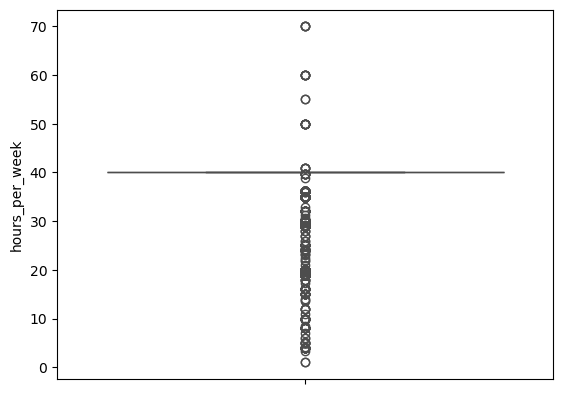

In [82]:
sns.boxplot(df['hours_per_week'], color = "red")

In [83]:
print(lb_HPW)
print(ub_HPW)

40.0
40.0


#### "As per the IQR, the value other than 40 is an outlier, but according to the domain study, the outliers are natural."
#####
#### "As seen in the boxplot, most of the points are concentrated below and around 40. Therefore, for the convenience of the Texas State Government, the points above 40 can be considered outliers. This is because the government must be aware of employee health issues due to overtime work."

In [85]:
outliers_HPW = df[df['hours_per_week'] > 40]
pd.set_option('display.max_rows', None)
outliers_HPW

agency                                        agency_name  \
37      101  SENATE                                        ...   
53      101  SENATE                                        ...   
56      101  SENATE                                        ...   
63      101  SENATE                                        ...   
78      101  SENATE                                        ...   
80      102  HOUSE OF REPRESENTATIVES                      ...   
81      102  HOUSE OF REPRESENTATIVES                      ...   
82      102  HOUSE OF REPRESENTATIVES                      ...   
83      102  HOUSE OF REPRESENTATIVES                      ...   
84      102  HOUSE OF REPRESENTATIVES                      ...   
85      102  HOUSE OF REPRESENTATIVES                      ...   
86      102  HOUSE OF REPRESENTATIVES                      ...   
87      102  HOUSE OF REPRESENTATIVES                      ...   
89      102  HOUSE OF REPRESENTATIVES                      ...   
90      102  HOUSE OF REPRESENTATIVES                      ...   
91      102  HOUSE OF REPRESENTATIVES                      ...   
93      102  HOUSE OF REPRESENTATIVES                      ...   
94      102  HOUSE OF REPRESENTATIVES                      ...   
95      102  HOUSE OF REPRESENTATIVES                      ...   
96      102  HOUSE OF REPRESENTATIVES                      ...   
97      102  HOUSE OF REPRESENTATIVES                      ...   
98      102  HOUSE OF REPRESENTATIVES                      ...   
99      102  HOUSE OF REPRESENTATIVES                      ...   
100     102  HOUSE OF REPRESENTATIVES                      ...   
101     102  HOUSE OF REPRESENTATIVES                      ...   

                          last_name                      first_name  \
37   BELTRAN                         AHITZA                           
53   KENNY                           PAT                              
56   MATEER                          TIMOTHY                          
63   ROCHA                           MARIE                            
78   WHITE                           MARK                             
80   CLINE                           GREGORY                          
81   CROW                            KORI                             
82   DIAZ                            DAVID                            
83   DUBBERKE                        TAMMY                            
84   DURAND                          SAMANTHA                         
85   GARZA JR                        ORLANDO                          
86   GOODMAN                         CALEB                            
87   HAGAN                           JOHN                             
89   JAAX                            EDWARD                           
90   LUMSDEN                         LAUREN                           
91   MENARD                          BRIANNA                          
93   PICARD                          RHONDA                           
94   PIOTRZKOWSKI                    RACHEL                           
95   REAGAN                          JACOB                            
96   SCHUMM                          BAILEY                           
97   SHIRLEY                         THERESA                          
98   SHUFELT                         BRYAN                            
99   SKIPTON IV                      JAMES                            
100  WETSEL                          RICHELLE                         
101  WINGATE                         MEREDITH                         

    middle_initial class_code  \
37               G   7103       
53                   7104       
56               E   7103       
63               S   7103       
78                   7103       
80               S   7110       
81               M   7110       
82               A   7110       
83               J   7110       
84               R   7110       
85                   7110       
86               T   7110       
87          

<Axes: ylabel='hourly_rate'>

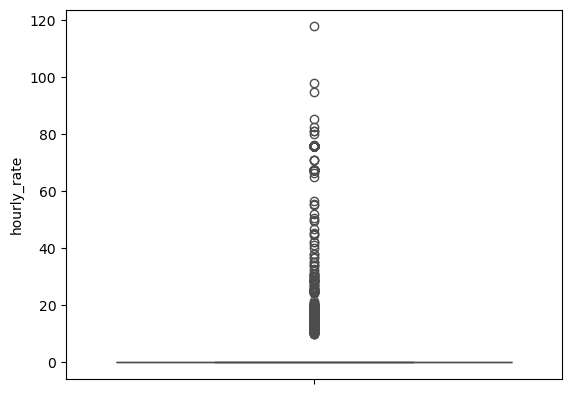

In [86]:
sns.boxplot(df['hourly_rate'], color = "red")

In [87]:
print(lb_HR)
print(ub_HR)

0.0
0.0


#### "As per the IQR method, the values that are not zero are considered outliers, but this does not make any sense."
#####
#### "As seen in the boxplot, the concentration of data is denser up to 80. Therefore, for the convenience of the Texas State Government, it is necessary to identify which employees are earning higher than usual per hour."

In [89]:
outliers_HR = df[df['hourly_rate'] > 80]
pd.set_option('display.max_rows', None)
outliers_HR

agency                                        agency_name  \
1         212  OFFICE OF COURT ADMINISTRATION                ...   
3         212  OFFICE OF COURT ADMINISTRATION                ...   
14901     323  TEACHER RETIREMENT SYSTEM                     ...   
33247     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   
40283     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   
67758     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   
67778     529  HEALTH AND HUMAN SERVICES COMMISSION          ...   

                            last_name                      first_name  \
1      RUCKER                          MORTON                           
3      SPECIA JR                       JOHN                             
14901  COOK                            DAVID                            
33247  BADIGER                         MALLIKARJUN                      
40283  DURAND-HOLLIS                   GABRIEL                          
67758  YEAGLEY                         SUSANNE                          
67778  YITTA                           SUSEELA                          

      middle_initial class_code  \
1                  V   3524       
3                  J   3524       
14901                  1624       
33247              P   4478       
40283                  4477       
67758              C   4438       
67778                  4438       

                                             class_title        ethnicity  \
1      GENERAL COUNSEL IV                            ...  WHITE             
3      GENERAL COUNSEL IV                            ...  WHITE             
14901  DIRECTOR V                                    ...  WHITE             
33247  PSYCHIATRIST III                              ...  AM INDIAN         
40283  PSYCHIATRIST II                               ...  HISPANIC          
67758  PHYSICIAN III                                 ...  WHITE             
67778  PHYSICIAN III                                 ...  ASIAN             

                gender                                    status employ_date  \
1      MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        02/01/15   
3      MALE             CTP - CLASSIFIED TEMPORARY PART-TIME        09/01/18   
14901  MALE             CRP - CLASSIFIED REGULAR PART-TIME          01/14/19   
33247  MALE             CRP - CLASSIFIED REGULAR PART-TIME          09/01/17   
40283  MALE             CRP - CLASSIFIED REGULAR PART-TIME          09/01/17   
67758  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME          09/01/17   
67778  FEMALE           CRP - CLASSIFIED REGULAR PART-TIME          09/01/17   

       hourly_rate  hours_per_week  monthly_income  annual_income  \
1         81.04454             4.0         1404.77       16857.24   
3         81.04453             4.0         1404.77       16857.24   
14901     82.63500            10.0         3580.85       42970.20   
33247    117.78848            20.0        10208.33      122499.96   
40283     85.16291             8.4         3099.92       37199.04   
67758     94.73365            20.0         8210.24       98522.88   
67778     97.95458            20.0         8489.39      101872.68   

       state_number  
1            127717  
3             59115  
14901        152498  
33247        352271  
40283         49898  
67758        788178  
67778        776784

# 6) Have salaries and total compensations for some roles/ departments/ head-count changed over time?

In [91]:
# Convert 'employ_date' to datetime format with specified format
df['employ_date'] = pd.to_datetime(df['employ_date'], format='%m/%d/%y')
df_sorted = df.sort_values(by='employ_date')
df_sorted.head(10)

agency                                        agency_name  \
141891     102  HOUSE OF REPRESENTATIVES                      ...   
116978     696  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   
20904      405  DEPARTMENT OF PUBLIC SAFETY                   ...   
88771      601  TEXAS DEPARTMENT OF TRANSPORTATION            ...   
142425     102  HOUSE OF REPRESENTATIVES                      ...   
92736      601  TEXAS DEPARTMENT OF TRANSPORTATION            ...   
1825       241  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
8236       304  COMPTROLLER OF PUBLIC ACCOUNTS                ...   
7973       304  COMPTROLLER OF PUBLIC ACCOUNTS                ...   
8155       304  COMPTROLLER OF PUBLIC ACCOUNTS                ...   

                             last_name                      first_name  \
141891  CRADDICK                        TOM                              
116978  JUDD                            ARTHUR                           
20904   HARALSON                        JOE                              
88771   HALFORD                         JULIA                            
142425  THOMPSON                        SENFRONIA                        
92736   OTAHAL                          MARY                             
1825    KEESHAN JR                      JAMES                            
8236    LEWIS                           MARGARET                         
7973    HUNTSMAN                        KEITH                            
8155    KOCH                            KENNETH                          

       middle_initial class_code  \
141891              R   7109       
116978              G   4675       
20904               W   9940       
88771               F   0152       
142425                  7109       
92736               M   1572       
1825                H   JD25       
8236                A   1063       
7973                N   0256       
8155                G   1068       

                                              class_title        ethnicity  \
141891  ELECTED OFFICIAL                              ...  WHITE             
116978  AGRICULTURE SPEC V                            ...  WHITE             
20904   SERGEANT, DPS                                 ...  WHITE             
88771   ADMINISTRATIVE ASST II                        ...  WHITE             
142425  ELECTED OFFICIAL                              ...  BLACK             
92736   PROGRAM SPECIALIST III                        ...  WHITE             
1825    JUDGE, RETIRED                                ...  WHITE             
8236    TAXPYR COMPLIANCE OFFCR V                     ...  BLACK             
7973    SYSTEMS ANALYST V                             ...  WHITE             
8155    TAX ANALYST IV                                ...  WHITE             

                 gender                                    status employ_date  \
141891  MALE             URF - UNCLASSIFIED REGULAR FULL-TIME      1969-01-14   
116978  MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1969-07-14   
20904   MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1971-10-06   
88771   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        1972-08-01   
142425  FEMALE           URF - UNCLASSIFIED REGULAR FULL-TIME      1973-01-09   
92736   FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        1973-09-10   
1825    MALE             URP - UNCLASSIFIED REGULAR PART-TIME      1975-09-01   
8236    FEMALE           CRF - CLASSIFIED REGULAR FULL-TIME        1976-03-15   
7973    MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1976-06-14   
8155    MALE             CRF - CLASSIFIED REGULAR FULL-TIME        1976-07-05   

        hourly_rate  hours_per_week  monthly_income  annual_income  \
141891       0.0000            40.0          600.00        7200.00   
116978       0.0000            40.0         4033.74       48404.88   
20904        0.0000            40.0         7207.91       86494.92   
88771

In [92]:
# Converting 'employ_date' to datetime format
df['employ_date'] = pd.to_datetime(df['employ_date'])
# Extracting year from 'employ_date'
df['year'] = df['employ_date'].dt.year
unique_years_counts = df['employ_date'].dt.year.value_counts()
print(unique_years_counts)

employ_date
2019    22017
2017    20447
2018    15940
2020    14557
2016    11387
2015     7107
2014     6328
2013     6006
2012     4831
2008     3907
2004     3548
2009     3513
2011     3455
2007     3356
2010     2963
2006     2878
2005     2665
2002     1682
2000     1629
2001     1598
2003     1468
1999     1341
1998     1210
1997      960
1996      918
1995      774
1994      725
1993      523
1992      511
1990      216
1991      203
1989      199
1987      138
1988      129
1985       84
1986       77
1984       53
1983       41
1981       29
1982       21
1979       12
1980       10
1977        7
1976        5
1978        5
1973        2
1969        2
1975        1
1971        1
1972        1
2068        1
Name: count, dtype: int64


In [93]:
# We drop the years which are the true outliers.
years_to_drop = [2068, 2069, 2071, 2072, 2073]
filtered_df = df[~df['year'].isin(years_to_drop)]

In [94]:
# Calculating average salary per year
max_salary_per_year = filtered_df.groupby('year')['annual_income'].max().reset_index()
print(max_salary_per_year)

    year  annual_income
0   1969       48404.88
1   1971       86494.92
2   1972       40661.28
3   1973       68796.00
4   1975      114549.84
5   1976      114549.84
6   1977      114549.84
7   1978      168000.00
8   1979      199366.56
9   1980      182201.04
10  1981      133144.68
11  1982      197333.88
12  1983      294000.00
13  1984      228774.96
14  1985      237000.00
15  1986      207107.04
16  1987      198164.04
17  1988      237927.96
18  1989      343999.92
19  1990      220000.08
20  1991      275500.92
21  1992      276815.88
22  1993      229092.00
23  1994      295640.40
24  1995      265000.08
25  1996      198164.04
26  1997      249999.96
27  1998      260946.12
28  1999      282353.28
29  2000      384375.00
30  2001      254225.52
31  2002      284850.00
32  2003      201000.00
33  2004      303000.00
34  2005      228774.96
35  2006      391999.92
36  2007      315000.00
37  2008      355141.44
38  2009      450000.00
39  2010      303000.00
40  2011      23

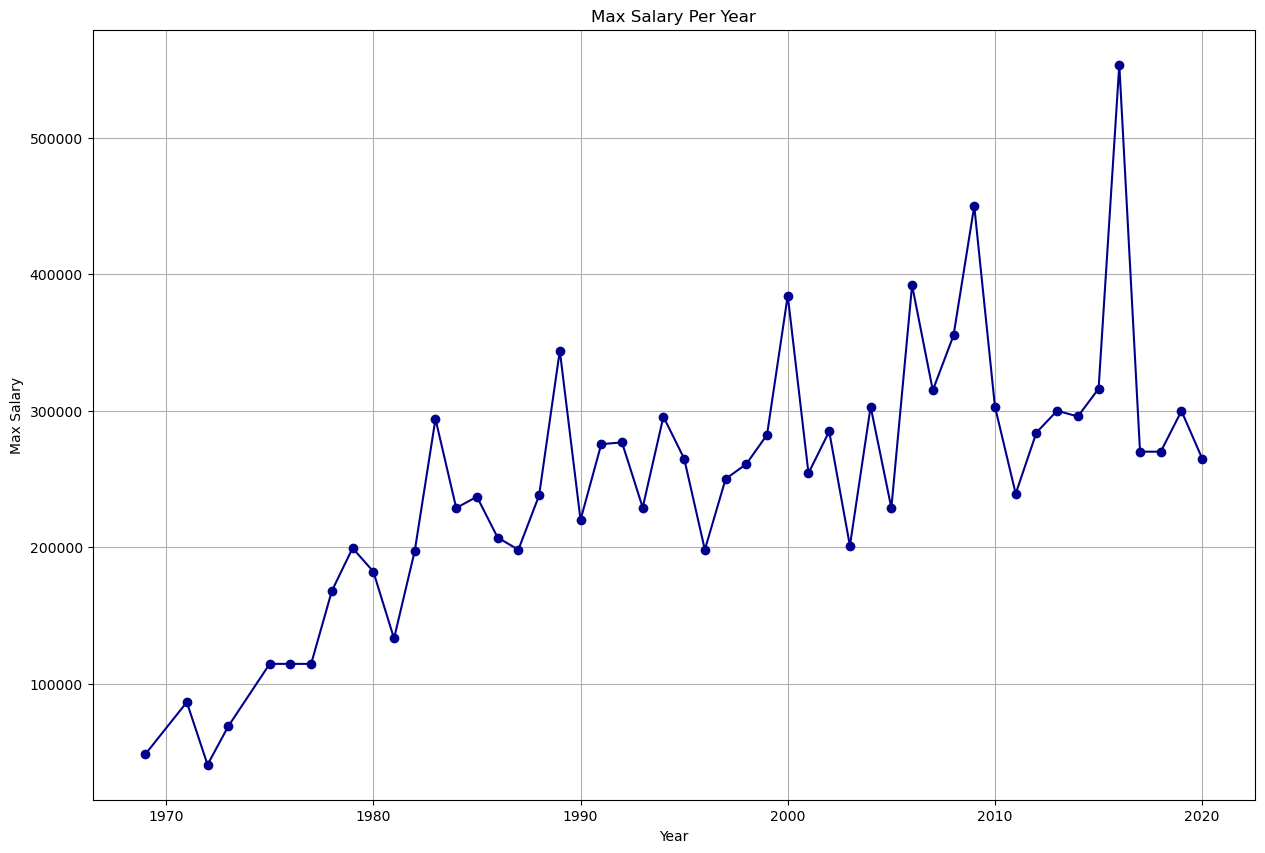

In [95]:
# Plotting the average salary per year
plt.figure(figsize=(15, 10))
plt.plot(max_salary_per_year['year'], max_salary_per_year['annual_income'], marker='o', linestyle='-', color='darkblue')
plt.title('Max Salary Per Year')
plt.xlabel('Year')
plt.ylabel('Max Salary')
plt.grid(True)
plt.show()


### Interpretation :
#### "As we can see, the maximum salary is increasing year by year."

In [155]:
data1=df[['agency_name','class_title','annual_income','employ_date']]
data1.head()

agency_name  \
0  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
1  OFFICE OF COURT ADMINISTRATION                ...   
2  COMPTROLLER OF PUBLIC ACCOUNTS, JUDICIARY SECT...   
3  OFFICE OF COURT ADMINISTRATION                ...   
4  TEXAS DEPARTMENT OF CRIMINAL JUSTICE          ...   

                                         class_title  annual_income  \
0  JUDGE, RETIRED                                ...      114549.84   
1  GENERAL COUNSEL IV                            ...       16857.24   
2  JUDGE, RETIRED                                ...      114549.84   
3  GENERAL COUNSEL IV                            ...       16857.24   
4  CORREC  OFFICER IV                            ...       39411.24   

  employ_date  
0  1988-02-18  
1  2015-02-01  
2  2020-02-01  
3  2018-09-01  
4  2020-06-29

In [157]:
df_1 = data1.groupby(['agency_name', 'class_title', 'employ_date']).first().reset_index()
df_1.to_csv('output.csv', index=False)

In [159]:
output_df = pd.read_csv('output.csv')
output_df.head(10)

agency_name  \
0  ALCOHOLIC BEVERAGE COMMISSION                 ...   
1  ALCOHOLIC BEVERAGE COMMISSION                 ...   
2  ALCOHOLIC BEVERAGE COMMISSION                 ...   
3  ALCOHOLIC BEVERAGE COMMISSION                 ...   
4  ALCOHOLIC BEVERAGE COMMISSION                 ...   
5  ALCOHOLIC BEVERAGE COMMISSION                 ...   
6  ALCOHOLIC BEVERAGE COMMISSION                 ...   
7  ALCOHOLIC BEVERAGE COMMISSION                 ...   
8  ALCOHOLIC BEVERAGE COMMISSION                 ...   
9  ALCOHOLIC BEVERAGE COMMISSION                 ...   

                                         class_title employ_date  \
0  ACCOUNTANT I                                  ...  2015-04-01   
1  ACCOUNTANT I                                  ...  2019-05-01   
2  ACCOUNTANT I                                  ...  2019-12-02   
3  ACCOUNTANT II                                 ...  2015-10-26   
4  ACCOUNTANT IV                                 ...  2015-04-01   
5  ACCOUNTANT IV                                 ...  2018-06-01   
6  ACCOUNTANT VI                                 ...  2014-05-01   
7  ACCOUNTANT VI                                 ...  2018-01-02   
8  ACCTS EXAM I                                  ...  2019-07-08   
9  ACCTS EXAM III                                ...  2017-12-01   

   annual_income  
0       39790.56  
1       39000.00  
2       39000.00  
3       42500.04  
4       48240.00  
5       53760.00  
6       63586.92  
7       63500.04  
8       36000.00  
9       41000.40

### Interpretation:
#### "Yes, for a few class titles with respect to agency names, the salaries have changed over time; however, for some, the salaries haven't changed."

# 7) What departments/roles have the biggest wage disparities between managers and employees?

In [163]:
df['annual_income'].max()

553500.0

In [165]:
max_salary =  df.loc[data['annual_income'] == 553500]
max_salary

agency                                        agency_name  \
83851     542  CANCER PREVENTION AND RESEARCH INSTITUTE OF TE...   

                            last_name                      first_name  \
83851  WILLSON                         JAMES                            

      middle_initial class_code  \
83851                  C542       

                                             class_title        ethnicity  \
83851  CHIEF SCIENTIFIC OFFICER                      ...  WHITE             

                gender                                    status employ_date  \
83851  MALE             ERF - EXEMPT REGULAR FULL-TIME            2016-03-01   

       hourly_rate  hours_per_week  monthly_income  annual_income  \
83851          0.0            40.0         46125.0       553500.0   

       state_number  year  
83851        372291  2016

In [167]:
df['annual_income'].min()

600.0

In [169]:
min_salary =  df.loc[data['annual_income'] == 600]
min_salary

agency                                        agency_name  \
142067     102  HOUSE OF REPRESENTATIVES                      ...   

                             last_name                      first_name  \
142067  HOUSTON                         DONTE                            

       middle_initial class_code  \
142067              D   7110       

                                              class_title        ethnicity  \
142067  ELECTED OFFICIALS STAFF                       ...  BLACK             

                 gender                                    status employ_date  \
142067  MALE             URP - UNCLASSIFIED REGULAR PART-TIME      2020-05-01   

        hourly_rate  hours_per_week  monthly_income  annual_income  \
142067          0.0            10.0            50.0          600.0   

        state_number  year  
142067        851628  2020

### Interpretation:
#### CANCER PREVENTION AND RESEARCH INSTITUTE OF TEXAS department is paying highest salary of 553500.0 to CHIEF SCIENTIFIC OFFICER.
####
#### HOUSE OF REPRESENTATIVES department is paying lowest salary of 600.0 to ELECTED OFFICIALS STAFF.
####

# 8) Model Comparison Report

In [173]:
print("mean squared error of DT regressor is:", mse_dec_tree)
print("coeff. of determination of DT regressor is:", r2_score_dec_tree )
print("mean squared error of rf model is :", mse_rf)
print("coeff. of determination for rf model is :", r2_score_rf )

mean squared error of DT regressor is: 0.11753053788406437
coeff. of determination of DT regressor is: 0.8826267076102641
mean squared error of rf model is : 0.06692564321668876
coeff. of determination for rf model is : 0.9331638973915678


#### It is clearly observed that the mean squared error (MSE) for the 'Random Forest Regressor' is lower than that of the 'Decision Tree Regressor', and the R² score is higher for the 'Random Forest Regressor' than the 'Decision Tree Regressor'. Therefore, the best model is the 'Random Forest Regressor'.
####
#### The 'Linear Regression Model' is not applicable for this dataset because there is no linear relationship between the dependent and independent variable.
####
#### The Support Vector Regression (SVR) model was also attempted, but due to the higher skewness in the data leading to more outliers, its performance was very low, and it required more time.
####
#### So for this dataset the best model is 'Random Forest Regressor'.
####

# 9) Challenges Faced

### 1) Dataset Quality :
#### The dataset contains unnecessary columns like 'duplicated', 'summed_annual_salary', 'hide_from_search', 'combined_multiple_jobs', and 'multiple_full_time_jobs', which contain mostly NaN values.
#### 
### 2) Non_Linear Relationship:
#### There is no linear relationship between the dependent and independent variables, so we can't use the linear regression model for prediction.
####
### 3) Time Consuming :
#### The dataset is complex, requiring more time to understand and select appropriate models.